In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [2]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [3]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [4]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [5]:
businesses.shape

(7544, 16)

In [6]:
violations.shape

(39720, 5)

In [7]:
inspections.shape

(27285, 4)

In [8]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

#inspect is all business and inspections joined on business_id to get inspection detail for every business
inspect = pd.merge(businesses, inspections, how='left', on=['business_id', 'business_id'])
#restaurant_scores joins all the 3 dataframs
restaurant_scores = pd.merge(inspect, violations, how='left', on=['business_id', 'date'])

In [9]:
inspect.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip,Score,date,type
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,NaN,20140124.0,Reinspection/Followup
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled
4,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110.0,Routine - Unscheduled


In [10]:
restaurant_scores.shape

(58787, 22)

In [11]:
# 2 Which ten business have had the most inspections?
#inspections dataframe offers all the info needed here
inspections.business_id.value_counts().head(10)

1775     21
74374    20
2505     20
71618    19
74131    19
67154    19
71804    19
489      18
7747     18
65523    17
Name: business_id, dtype: int64

In [12]:
# 3 Group and count the inspections by type
inspections.type.value_counts()

Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [13]:
#restaurant_scores.groupby('date').business_id.value_counts()
restaurant_scores.type.value_counts()

Routine - Unscheduled                42054
Reinspection/Followup                 6020
Complaint                             3150
New Ownership                         2660
New Construction                      1635
Non-inspection site visit             1003
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  141
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [14]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
#sns.heatmap(restaurant_scores.corr())
#restaurant_scores.month
import datetime
#d = datetime.date.today()
#d.month
#restaurant_scores['month'] = 
#restaurant_scores['month'] =  restaurant_scores.date.apply(lambda x:str(x)[4:-4])
#restaurant_scores.groupby('month').business_id.value_counts().plot(kind='bar', title='Businesses per Month')
#plt.xlabel('Month')
#plt.ylabel('Businesses')


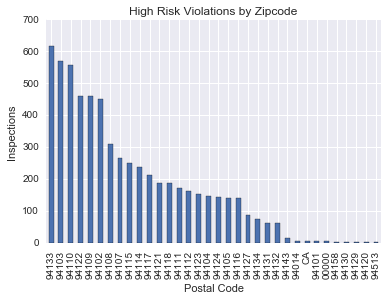

In [15]:
# 5 Which zip code contains the most high risk violations?
cols = ['postal_code', 'risk_category']
restaurant_scores[(restaurant_scores.risk_category=='High Risk')&(restaurant_scores.date.notnull())].postal_code.value_counts().plot(kind='bar', title='High Risk Violations by Zipcode')
plt.xlabel('Postal Code')
plt.ylabel('Inspections')

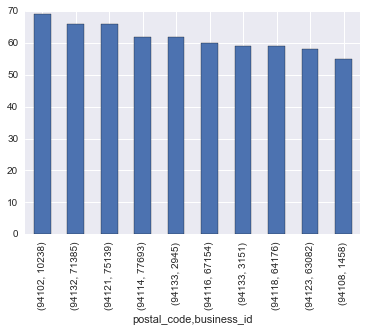

In [16]:
restaurant_scores.groupby(['postal_code'])['business_id'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

In [17]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [18]:
restaurant_scores.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,NaN,NaN,NaN
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,20140124.0,Reinspection/Followup,NaN,NaN,NaN
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings


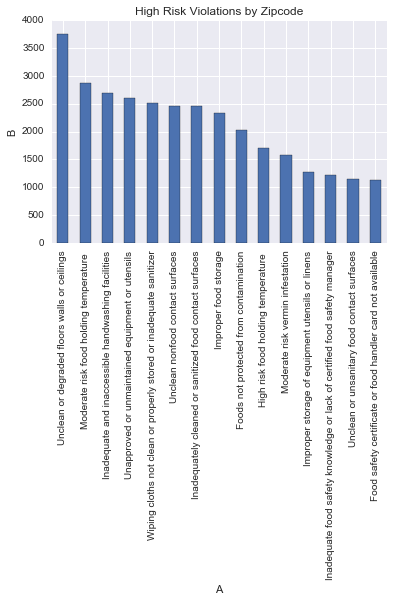

In [19]:
# 7 Examining the descriptions, what is the most common violation?
#restaurant_scores.type.value_counts().hist(bins=25)

restaurant_scores.description.value_counts().head(15).plot(kind='bar', title='High Risk Violations by Zipcode')
plt.xlabel('A')
plt.ylabel('B')

In [20]:
restaurant_scores.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3746
Name: description, dtype: int64

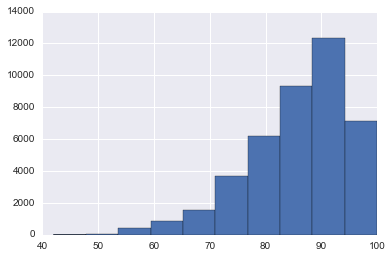

In [21]:
# 8 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins=10)

In [26]:
# 9 Can you predict risk category based on the other features in this dataset?
restaurant_scores.Score.fillna(value='risk_category')
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['Score']
X = restaurant_scores[feature_cols]
y = restaurant_scores.risk_category
linreg.fit(X, y)




#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=1)
#knn.fit(X, y)
#knn.score(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/
restaurant_scores[restaurant_scores.risk_category=='High Risk'].business_id.value_counts().head(1)

33446    20
Name: business_id, dtype: int64

In [369]:
restaurant_scores[restaurant_scores.business_id==33446][['latitude','longitude']].head(1)

,latitude,longitude
26191,37.752678,-122.411722


In [129]:
import requests  
#r= requests.get('https://api.instagram.com/v1/locations/search?lat=37.752678&lng=-122.411722&access_token=ACCESS-TOKEN')
#step 1
client_id='89cd60036b3f4e8a90a77a79d67ba0e5'
client_secret='c97998a94bca482882d43361db640004'
redirectURI = 'https://www.instagram.com/developer/clients/register/'
#step2
url = 'https://api.instagram.com/oauth/authorize/?client_id='+client_id+'&redirect_uri='+redirectURI+'&response_type=code'
code = requests.get(url)

In [130]:
code.url

u'https://www.instagram.com/accounts/login/?force_classic_login=&next=/oauth/authorize/%3Fclient_id%3D89cd60036b3f4e8a90a77a79d67ba0e5%26redirect_uri%3Dhttps%3A//www.instagram.com/developer/clients/register/%26response_type%3Dcode'

In [126]:
print url
code ='86f175cac9b6492cbc1f9d56dbc83329'


https://api.instagram.com/oauth/authorize/?client_id=89cd60036b3f4e8a90a77a79d67ba0e5&redirect_uri=https://www.instagram.com/developer/clients/register/&response_type=code


In [127]:
payload = {'client_id': client_id, 'client_secret': client_secret, 'grant_type':'authorization_code', 'redirect_uri' : 'https://www.instagram.com/developer/clients/register/', 'code' : code}
r = requests.post("https://api.instagram.com/oauth/access_token", params = payload)
#access_token = r.json()['access_token']
#access_token
payload

{'client_id': '89cd60036b3f4e8a90a77a79d67ba0e5',
 'client_secret': 'c97998a94bca482882d43361db640004',
 'code': '86f175cac9b6492cbc1f9d56dbc83329',
 'grant_type': 'authorization_code',
 'redirect_uri': 'https://www.instagram.com/developer/clients/register/'}

In [128]:
r.text

u'{"code": 400, "error_type": "OAuthException", "error_message": "You must provide a client_id"}'

In [124]:
access_token = '86f175cac9b6492cbc1f9d56dbc83329'
#'6c9dd51f32d74739bcce0b72bf6b4bb5'
#'414e7623b627453eb68f91dd3b230c69'
'https://www.instagram.com/developer/clients/register/?code=0c8c5c18fe2d4f40bea75d0235bcf859'
#https://www.instagram.com/developer/clients/register/?code=414e7623b627453eb68f91dd3b230c69
url2 ='https://api.instagram.com/v1/locations/search?lat=37.752678&lng=-122.411722&access_token='+access_token
r= requests.get('https://api.instagram.com/v1/locations/search?lat=37.752678&lng=-122.411722&access_token='+access_token)

In [125]:
r.text

u'{"meta": {"error_type": "OAuthAccessTokenException", "code": 400, "error_message": "The access_token provided is invalid."}}'

In [122]:
r.text

u'{"meta": {"error_type": "OAuthAccessTokenException", "code": 400, "error_message": "The access_token provided is invalid."}}'

In [37]:
r.status_code

404

In [405]:
s = requests.get('https://api.instagram.com/oauth/authorize/?client_id=CLIENT-ID&redirect_uri=REDIRECT-URI&response_type=code')

In [407]:
s.text

u'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en" class="no-js lt-ie9 lt-ie8 lt-ie7 not-logged-in "> <![endif]-->\n<!--[if IE 7]>         <html lang="en" class="no-js lt-ie9 lt-ie8 not-logged-in "> <![endif]-->\n<!--[if IE 8]>         <html lang="en" class="no-js lt-ie9 not-logged-in "> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en" class="no-js not-logged-in "> <!--<![endif]-->\n    <head>\n        \n    <script type="text/javascript">window._timings = {"domLoading": Date.now()}</script>\n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n        <title>Log in &mdash; Instagram</title>\n\n        <script type="text/javascript">\n  WebFontConfig = {\n    custom: {\n      families: [\'proxima-nova:n3,n4,n6,n7\'],\n    }\n  };\n</script>\n<script src="//instagramstatic-a.akamaihd.net/h1/scripts/webfont.js/c0456c81549b.js" type="text/javascript" async></script>\n\n<style type="text/css">\n  /* @license\n   * MyFonts Webfont Bui

In [ ]:
############################
### A Little More Morbid ###
############################

In [148]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [149]:
killings.describe()

,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467.0,467.000000
mean,233.000000,37.351178,15.830835,2015.0,52527.331906
std,134.955548,12.944617,8.658970,0.0,12948.263811
min,0.000000,16.000000,1.000000,2015.0,22545.000000
25%,116.500000,28.000000,8.000000,2015.0,43804.000000
50%,233.000000,35.000000,16.000000,2015.0,50856.000000
75%,349.500000,45.000000,23.000000,2015.0,56832.000000
max,466.000000,87.000000,31.000000,2015.0,110292.000000


In [150]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.columns = killings.columns.str.replace('lawenforcementagency','agency')
killings.columns = killings.columns.str.replace('raceethnicity','race')
killings.columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'agency', u'cause',
       u'armed', u'county_income'],
      dtype='object')

In [151]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [152]:
# 3. replace each null value in the dataframe with the string "Unknown"
#killings[killings.streetaddress.isnull()].streetaddress
killings = killings.fillna(value='Unknown')

In [153]:
#validation
#killings.isnull().sum()
killings.describe()

,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467.0,467.000000
mean,233.000000,37.351178,15.830835,2015.0,52527.331906
std,134.955548,12.944617,8.658970,0.0,12948.263811
min,0.000000,16.000000,1.000000,2015.0,22545.000000
25%,116.500000,28.000000,8.000000,2015.0,43804.000000
50%,233.000000,35.000000,16.000000,2015.0,50856.000000
75%,349.500000,45.000000,23.000000,2015.0,56832.000000
max,466.000000,87.000000,31.000000,2015.0,110292.000000


In [163]:
# 4. How many killings were there so far in 2015?
killings[killings.year==2015].year.value_counts()

2015    467
Name: year, dtype: int64

In [172]:
# 5. Of all killings, how many were male and how many female?
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

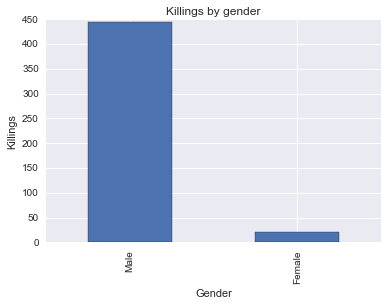

In [176]:
killings.gender.value_counts().plot(kind='bar', title='Killings by gender')
plt.xlabel('Gender')
plt.ylabel('Killings')

In [180]:
# 6. How many killings were of unarmed people?
killings.armed.value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

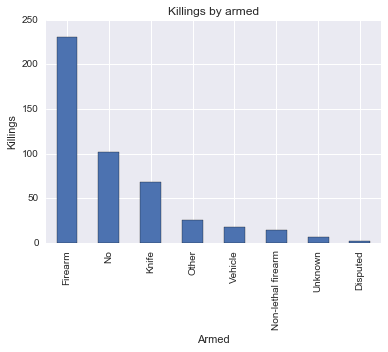

In [181]:
killings.armed.value_counts().plot(kind='bar', title='Killings by armed')
plt.xlabel('Armed')
plt.ylabel('Killings')

In [325]:
# 7. What percentage of all killings were unarmed?
100* (killings.armed[killings.armed=='No'].value_counts() /killings.armed.count())

No    21.841542
Name: armed, dtype: float64

In [184]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [185]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

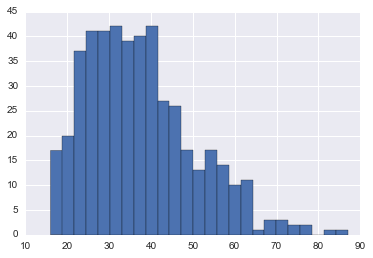

In [192]:
# 10. Display a histogram of ages of all killings
killings.age.hist(bins=25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11da2d1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121410b10>]], dtype=object)

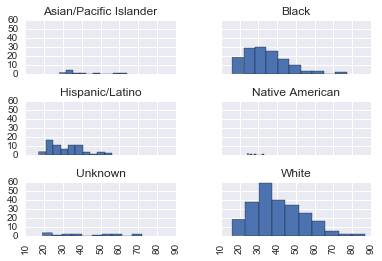

In [198]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, bins=10, sharex=True, sharey=True)

In [203]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

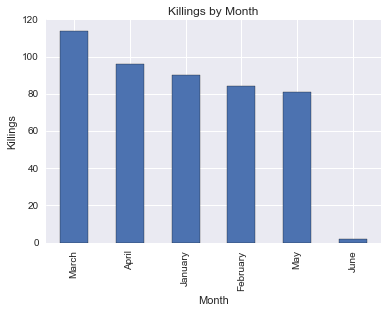

In [208]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar', title='Killings by Month')
plt.xlabel('Month')
plt.ylabel('Killings')

In [209]:
###################
### Less Morbid ###
###################

In [229]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [230]:
len(majors.columns)

12

In [231]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
#majors = majors.drop('employed_full_time_year_round', 1) 

majors.drop(['Employed_full_time_year_round', 'Major_code'],inplace=True,axis=1)

In [232]:
len(majors.columns)

10

In [234]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [378]:
# 3. What are the top 10 highest paying majors?
majors.sort_values(by='P75th', ascending=[False])[['Major','P75th']].head(10)

,Major,P75th
59,PETROLEUM ENGINEERING,210000.0
97,MATHEMATICS AND COMPUTER SCIENCE,136000.0
58,NUCLEAR ENGINEERING,128000.0
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,125000.0
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,125000.0
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,125000.0
56,MINING AND MINERAL ENGINEERING,124000.0
55,METALLURGICAL ENGINEERING,123000.0
45,CHEMICAL ENGINEERING,120000.0
48,ELECTRICAL ENGINEERING,116000.0


' awesome'

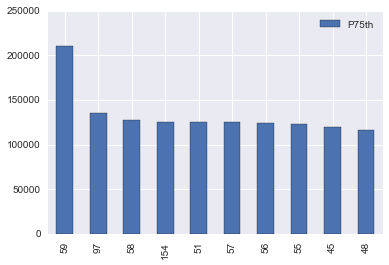

In [379]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors.sort_values(by='P75th', ascending=[False])[['Major','P75th']].head(10).plot(kind='bar')

In [380]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category')['Median'].mean()


Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [381]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category')['Median'].mean().sort_values().tail()

Major_category
Health                     56458.333333
Business                   60615.384615
Physical Sciences          62400.000000
Computers & Mathematics    66272.727273
Engineering                77758.620690
Name: Median, dtype: float64

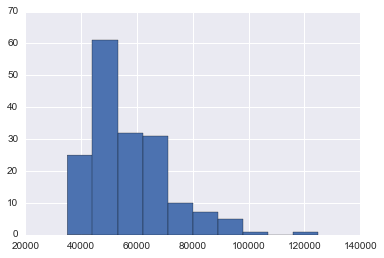

In [382]:
# 7. Plot a histogram of the distribution of median salaries
majors['Median'].hist()

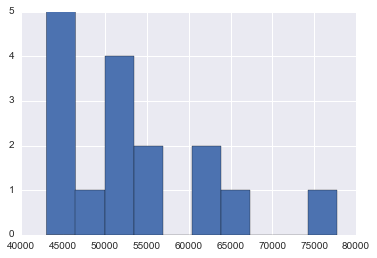

In [383]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.groupby('Major_category')['Median'].mean().sort_values().hist()

In [384]:
# 9. What are the top 10 most UNemployed majors?
majors.sort_values(by="Unemployed")['Major'].head(10)

51         GEOLOGICAL AND GEOPHYSICAL ENGINEERING
26     EDUCATIONAL ADMINISTRATION AND SUPERVISION
85                                   PHARMACOLOGY
111                             MATERIALS SCIENCE
97               MATHEMATICS AND COMPUTER SCIENCE
27                      SCHOOL STUDENT COUNSELING
93                          MILITARY TECHNOLOGIES
83                                       GENETICS
103                             PHYSICAL SCIENCES
7                       MISCELLANEOUS AGRICULTURE
Name: Major, dtype: object

In [385]:
# What are the unemployment rates?
majors.sort_values(by="Unemployment_rate")['Unemployment_rate']

26     0.000000
51     0.000000
85     0.016111
111    0.022333
97     0.024900
0      0.026147
155    0.026292
153    0.026797
1      0.028636
2      0.030248
150    0.031357
5      0.031791
29     0.032983
36     0.033357
80     0.034024
154    0.034358
151    0.036210
105    0.036726
28     0.038359
103    0.038953
39     0.039215
7      0.039230
57     0.040309
38     0.040973
83     0.041591
41     0.041971
32     0.042200
59     0.042205
102    0.042505
9      0.042563
         ...   
172    0.073500
74     0.073615
142    0.073920
95     0.074330
101    0.075020
22     0.075046
115    0.075631
94     0.077269
76     0.077844
128    0.078176
44     0.079036
123    0.079217
139    0.080274
67     0.081348
120    0.082009
15     0.083005
118    0.083629
145    0.083714
17     0.085009
143    0.085619
11     0.085991
104    0.086022
119    0.087336
19     0.090264
141    0.094658
77     0.094843
27     0.101746
93     0.101796
116    0.102712
146    0.156147
Name: Unemployment_rate,

In [386]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category')['Unemployment_rate'].mean()

Major_category
Agriculture & Natural Resources        0.039569
Arts                                   0.087601
Biology & Life Science                 0.049936
Business                               0.054496
Communications & Journalism            0.069125
Computers & Mathematics                0.059437
Education                              0.046762
Engineering                            0.050630
Health                                 0.047209
Humanities & Liberal Arts              0.069429
Industrial Arts & Consumer Services    0.058546
Interdisciplinary                      0.077269
Law & Public Policy                    0.067854
Physical Sciences                      0.054541
Psychology & Social Work               0.077867
Social Science                         0.065686
Name: Unemployment_rate, dtype: float64

In [388]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors['Employed'] / majors['Total']
majors.sample_employment_rate.head()

0    0.704225
1    0.806338
2    0.775173
3    0.783948
4    0.711738
Name: sample_employment_rate, dtype: float64

In [391]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = (majors['Total']-majors['Employed']) / majors['Total']
majors.sample_unemployment_rate.head()

0    0.295775
1    0.193662
2    0.224827
3    0.216052
4    0.288262
Name: sample_unemployment_rate, dtype: float64